
# Momentum Optimization

Momentum optimization is a variant of the gradient descent algorithm that accelerates convergence, especially in the case of steep, narrow valleys in the cost function. This is achieved by adding a fraction of the update vector of the past time step to the current update vector.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Some helper functions for plotting and drawing lines
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)


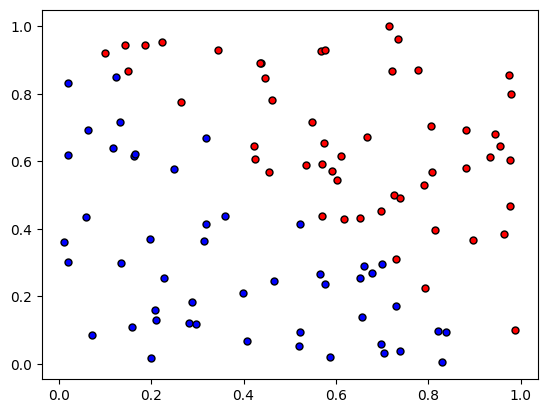

In [2]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.array([1 if x[0] + x[1] > 1 else 0 for x in X])
plot_points(X,y)
plt.show()



## Implementing Momentum

The momentum update rule is given by:

$$ v_t = \beta v_{t-1} + (1 - \beta) \nabla J(\theta) $$
$$ \theta = \theta - \alpha v_t $$

Where:
- $ v_t $ is the velocity (or the accumulated gradient)
- $ \beta $ is the momentum parameter
- $ \alpha $ is the learning rate
- $ \nabla J(\theta) $ is the gradient of the cost function with respect to the parameters
- $ \theta $ are the parameters of the model


In [3]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y*np.log(output) - (1 - y) * np.log(1-output)

# Momentum gradient descent step
def update_weights(x, y, weights, bias, learnrate, velocity, beta):
    output = output_formula(x,weights,bias)
    d_error = -(y-output)
    gradient = d_error * x
    velocity = beta * velocity + (1 - beta) * gradient
    weights -= learnrate * velocity
    bias -= learnrate * d_error
    return weights, bias, velocity


In [4]:
np.random.seed(44)

epochs = 100
learnrate = 0.01
beta = 0.9

def train(features, targets, epochs, learnrate, beta, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    velocity = np.zeros(weights.shape)
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias, velocity = update_weights(x, y, weights, bias, learnrate, velocity, beta)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()



========== Epoch 0 ==========
Train loss:  0.6495292385017851
Accuracy:  0.68

========== Epoch 10 ==========
Train loss:  0.5849264679771025
Accuracy:  0.8

========== Epoch 20 ==========
Train loss:  0.5343610261933457
Accuracy:  0.85

========== Epoch 30 ==========
Train loss:  0.49376903115607407
Accuracy:  0.86

========== Epoch 40 ==========
Train loss:  0.46070446519466074
Accuracy:  0.88

========== Epoch 50 ==========
Train loss:  0.4333574442016189
Accuracy:  0.88

========== Epoch 60 ==========
Train loss:  0.4104033053743069
Accuracy:  0.9

========== Epoch 70 ==========
Train loss:  0.3908711029868978
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.37404321339855057
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3593829692873451
Accuracy:  0.94


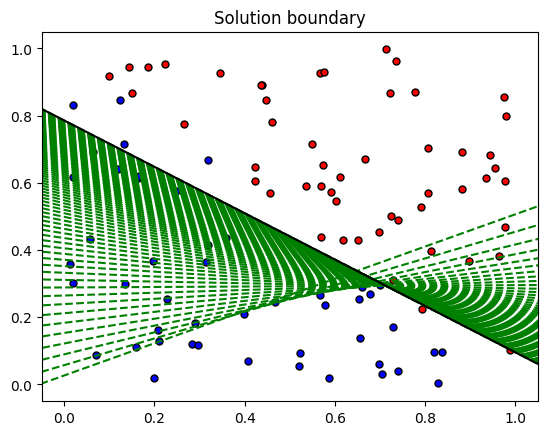

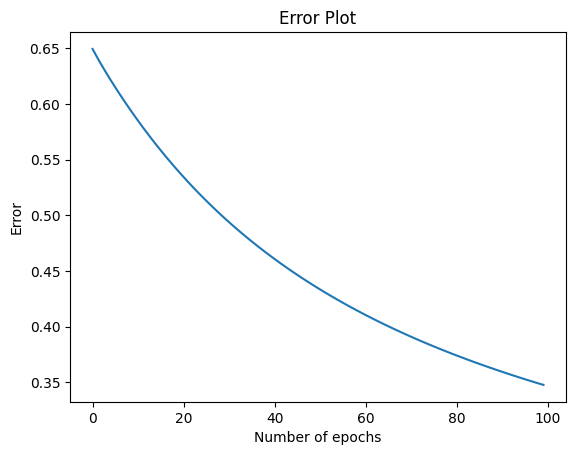

In [5]:
train(X, y, epochs, learnrate, beta, True)